# Compulsory Assignment 1: Dense neural networks - Implementing an ANN with Keras

Please fill out the the group name, number, members and optionally the group name below.

**Group number**: 43 !We have sent email about change of group members! \
**Group member 1**: Maria Bashir\
**Group member 2**: Muna Ahmed Farah\
**Group member 3**: Martina Dalbakk\
**Group name (optional)**:

# Assignment submission

To complete this assignment, answer the all the questions in this notebook and write the code required to implement different models. **Submit the assignment by handing in this notebook as both an .ipynb file and a .pdf file**.

Here are some do’s and don’ts for the submission:

- Read questions thoroughly before answering.
- Make sure to answer all questions.
- Ensure all code cells are run.
- Label all axes in plots.
- Ensure all figures are visible in the PDF.

# Introduction

In this assignment we will continue with the task of classifying handwritten digits from the MNIST dataset, used in the voluntary assignment where we designed a neural network from scratch. But, today you will implement the network using the Keras API of the TensorFlow library. TensorFlow and PyTorch are both free open-source software libraries intended to simplify multiplication of tensors, but are mostly used for the design and implementation of deep neural networks. Both libraries simplify the implementation of neural networks, and allow for faster training of networks by utlizing hardware acceleration with Graphical Processing Units (GPUs) or Tensor Processing Units (TPUs)

TensorFlow was developed by Google Brain for internal use in Google and was initially released under Apache 2.0 License in 2015 [1](https://en.wikipedia.org/wiki/TensorFlow). Keras was initially released as separate software library, developed by François Chollet, to simplify the Python interface for design of artificial neural networks. Up until version 2.3 Keras supported multiple backend libraries including TensorFlow, Microsoft Cognitive Toolkit, Theano, and PlaidML [2](https://en.wikipedia.org/wiki/Keras). When TensorFlow 2.0 was released in 2019, keras was included as a TensorFlow specific API that is accessible by:

```python
import tensorflow.keras as ks
```
PyTorch was originally developed by Meta AI (formerly known as Facebook) in 2016, but is now under umbrella of the Linux foundation, and is open-source under the BSD license [3](https://en.wikipedia.org/wiki/PyTorch). While TensorFlow was the most popular framework for a long time, PyTorch has been gaining more and more users in the last five years and is now more used in industry and is becoming more popular in research as well.

The lectures of DAT300 will be taught using the Keras API in TensorFlow, and we recommend you to stick with Keras and TensorFlow for this course as it is easier for beginners to get started with.

## Assignment structure

1. Part 1: Import, preprocess, and visualize the data.
2. Part 2: Use the Keras API to implement a Dense Neural Network (NN) that resembles the model given in the voluntary assignment.
3. Part 3: Design your own Dense Neural Network (NN) architecture for classifying MNIST in Keras.
4. Part 4: Train a Machine Learning classifier that you learned about in DAT200.
5. Part 5: Compare and discuss the results.

## Note on the voluntary assignment

Some of the questions in this task will ask you to compare the results from training this network to the results you had in the voluntary assignment with regard to training algorithm used and the time it took to train the network implemented with Numpy and with TensorFlow/PyTorch. If you did not do the voluntary assignment yourself, have a look at the solutions that should be posted and run through the solutions-notebook to get the results you need for a comparison.


## Library imports

In [ ]:
import time
from tqdm import tqdm # Cool progress bar

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras as ks

import matplotlib.pyplot as plt
import seaborn as sns
from utilities import *

SEED = 458
RNG = np.random.default_rng(SEED) # Random number generator

# Task 1: Importing, preprocess and visualizing the data
To import the data of the MNIST dataset for this assignment
* Copy the data/ folder from the folder where you kept the last assignment, and run the load_data() function from the `utilities.py` file.
* Just download the data again by re-running the load_data() function from the `utilities.py` file.

In this assignment you yourselves will be responsible for the data-preprocessing. Use the cells below for preprocessing and visualization, and optionally some exploration of the dataset if you feel inclined.

## Importing data

In [ ]:
datasets = load_mnist(verbose=0)
X_train, y_train = datasets['X_train'], datasets['y_train']
X_val,   y_val   = datasets['X_val'],   datasets['y_val']
X_test,  y_test  = datasets['X_test'],  datasets['y_test']

X_train = np.concatenate([X_train, X_val], axis=0)
y_train = np.concatenate([y_train, y_val], axis=0).astype('int32')

del datasets, X_val, y_val # Good to reduce uneccesary RAM usage

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Task 1.1 Preprocessing
Preprocess the data in whatever way you find sensible. Remember to comment on what you do.

In [ ]:
# Normalizing datasets between [0,1]
X_train = X_train.astype("float32") / np.max(X_train)
X_test = X_test.astype("float32") / np.max(X_test)

## Task 1.2 Visualization
Visualize the data in whatever manner you find helpful/sensible and briefly comment on the plots.

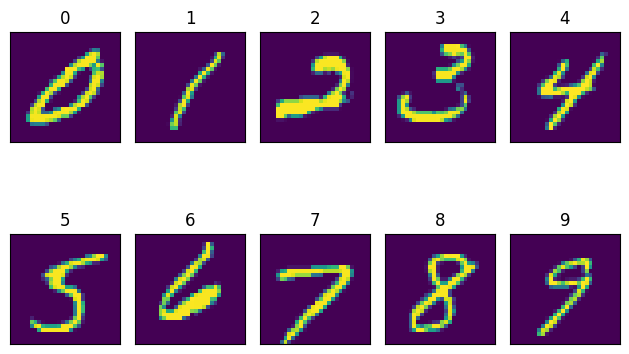

In [ ]:
# Visualize an image from each class
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

for i in range(10):
    img = X_train[y_train == i][-1] # find the last image of each class
    ax[i].imshow(img)
    ax[i].set_title(classes[i])

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Task 2: TensorFlow vs. Numpy
In this task you will redesign the network you implemented in Numpy (from the voluntary assignment) using TensorFlow, and then compare the two implementations.
## Task 2.1: Implement the F1-score
In the cell below, implement or import a function for the F1-score metric.

In [ ]:
# F1-score class from: https://keras.io/api/metrics/classification_metrics/#f1score-class
f1_score = ks.metrics.F1Score(average=None, threshold=None, name="f1_score", dtype=None)

## Task 2.2: Implement the network from the voluntary assignment
Implement a network with the following architecture:
* Input layer: (28, 28)
* Hidden layer: 30 units, sigmoid activation
* Output layer: 10 units, sigmoid activation

Compile the model using:
* The `'MSE'` loss function
* The `SGD` optimizer with `learning_rate=0.25`
* both `'accuracy'` and the implementation of the **F1-score** from Task 2.1 as metrics

Train the model using:
* batch size of 10 images
* 5 epochs
* A validation split of 1/6

Implement the model in the code cell(s) below.

In [ ]:
# One-hot encode target variable to convert it into a categorical variable
y_train = ks.utils.to_categorical(y_train.astype("float32"))
y_test = ks.utils.to_categorical(y_test.astype("float32"))

# Implement network
model = ks.models.Sequential(
    [
        ks.layers.Input((28,28)), # input layer
        ks.layers.Flatten(),
        ks.layers.Dense(30, activation='sigmoid'), # hidden layder
        ks.layers.Dense(10, activation='sigmoid') # output layer
    ])

# Compile model
model.compile(loss='mse',
              optimizer=ks.optimizers.SGD(learning_rate=0.25),
              metrics=['accuracy', f1_score])

# Train model
start_time = time.time()
training_history = model.fit(X_train, y_train, epochs=5, batch_size=10,
                             validation_split=(1/6))
end_time = time.time()

# Evaluate model on the test data
print('Final evaluation on test data:')
model.evaluate(X_test, y_test, return_dict=True)

print(f'Training time is {end_time - start_time} seconds.')

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4743 - f1_score: 0.4093 - loss: 0.0789 - val_accuracy: 0.8330 - val_f1_score: 0.8240 - val_loss: 0.0383
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8500 - f1_score: 0.8441 - loss: 0.0340 - val_accuracy: 0.8885 - val_f1_score: 0.8858 - val_loss: 0.0250
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8863 - f1_score: 0.8840 - loss: 0.0238 - val_accuracy: 0.9013 - val_f1_score: 0.8995 - val_loss: 0.0204
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8934 - f1_score: 0.8914 - loss: 0.0204 - val_accuracy: 0.9068 - val_f1_score: 0.9051 - val_loss: 0.0181
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9048 - f1_score: 0.9031 - loss: 0.0179 - val_accuracy: 0.9109 - val_f1_score: 0.9093 - val_loss: 0.0166
Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8970 - f1_score: 0.8953 - loss: 0.0183
Training time i

## Task 2.3: Train the network and plot the training history
Train the model and plot the training history in the code cell(s) below. Use the same method for plotting the training process as in the voluntary assignment. Feel free to use the function `plot_training_history()` from `utilities.py`

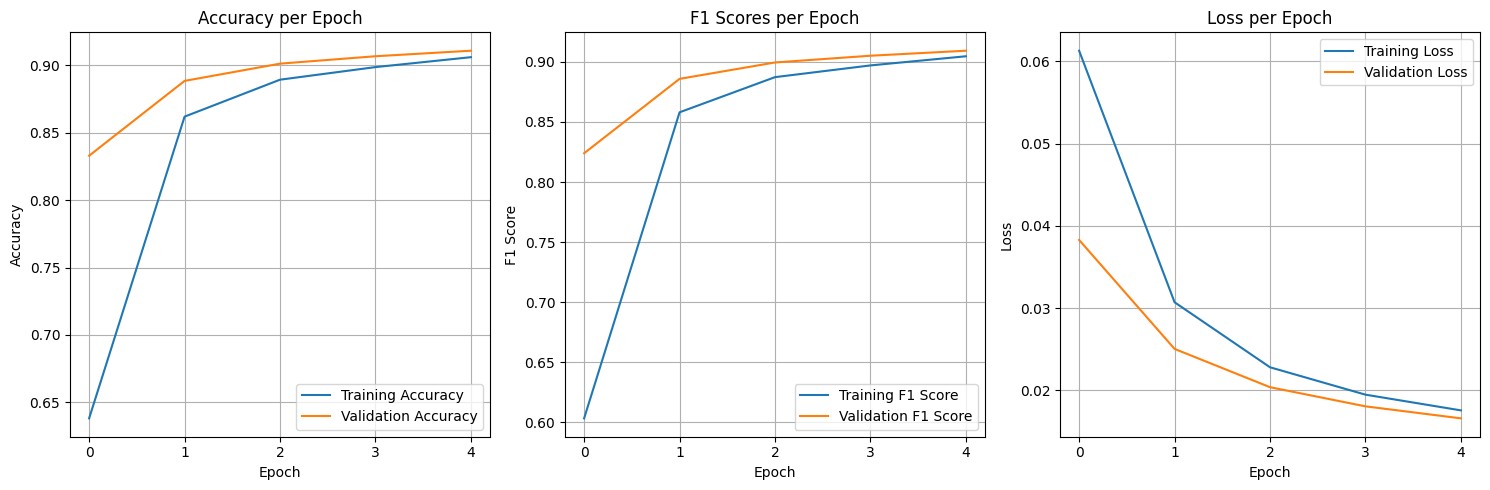

In [ ]:
# Plot the training history
# plot_training_history(training_history) does not work due to errors in the
# size of the arrays that is the result of the training-history object.
# Decided to manually plot f1-scores, accuracies and loss:

# Extracting data from training history
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']
f1_scores = training_history.history['f1_score']
val_f1_scores = training_history.history['val_f1_score']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

# Calculating average F1 scores
average_f1_scores = np.mean(f1_scores, axis=1)
average_val_f1_scores = np.mean(val_f1_scores, axis=1)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Accuracy
axs[0].plot(accuracy, label='Training Accuracy')
axs[0].plot(val_accuracy, label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(range(len(accuracy)))
axs[0].grid()
axs[0].legend()

# Plot F1 Scores
axs[1].plot(average_f1_scores, label='Training F1 Score')
axs[1].plot(average_val_f1_scores, label='Validation F1 Score')
axs[1].set_title('F1 Scores per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('F1 Score')
axs[1].set_xticks(range(len(average_f1_scores)))
axs[1].grid()
axs[1].legend()

# Plot Loss
axs[2].plot(loss, label='Training Loss')
axs[2].plot(val_loss, label='Validation Loss')
axs[2].set_title('Loss per Epoch')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Loss')
axs[2].set_xticks(range(len(loss)))
axs[2].grid()
axs[2].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## Task 2.4: Compare the results from the TensorFlow implementation with the Numpy implementation
**Question 2.4.1**: How long did it take to train the TensorFlow implementation of the network on the *entire* dataset for five epochs compared to the time it took to train the Numpy implementation?

**Question 2.4.2**: What is the biggest (defining) difference in how the TensorFlow implementation **was trained** compared to the Numpy implementation?

The TensorFlow implementation automates most of the heavy work such as  backpropagation, gradient updates, etc, with efficient libraries, while Numpy requires manual implementation, making it slower and more prone to errors.

**Question 2.4.3**: Were there any significant differences in the ease of implementation and the amount of code needed for the TensorFlow and Numpy implementations?



**Answer 2.4.1**:The TensorFlow implementation trained the network on the entire dataset (50,000 images) for 5 epochs, taking around 50–60 seconds in total (approximately 10–14 seconds per epoch).

In contrast, Numpy implementation was trained on a smaller subset of the dataset and completed 10 iterations in 14.9 seconds. If the Numpy implementation were trained on the full dataset for 5 epochs, it would have taken  longer due to its lack of optimizations, possibly taking minutes compared to TensorFlow.

**Answer 2.4.2**:The TensorFlow implementation automates most of the heavy work such as  backpropagation, gradient updates, etc, with efficient libraries, while Numpy requires manual implementation, making it slower and more prone to errors.

**Answer 2.4.3**:TensorFlow (Keras) significantly reduces the complexity and amount of code needed to implement and train neural networks as compared to a Numpy implementation, which requires far more lines of codes for data handling, backpropagation, weight initialization and gradient descent updates.. TensorFlow lessens much of the underlying complexity, making it faster and easier for developers to work with. It is easy to define , compile and train models with fewer lines of code. It is quite straightforward to specify the loss function and optimizer.

# Task 3: Design your own ANN architecture
As you probably noticed in the last task, the performance of the simple network with a single hidden layer and 30 hidden units does not perform particularily well. In this task you are free to design the network architecture for the MNIST handwritten digit recognition challenge with a couple of stipulations:
* use **only Dense or fully connected layers**,
* use both **accuracy and the F1-score** as performance metrics.

Otherwise, you are free to use whatever loss-function, optimizer and activation functions you want and train it for as many epochs you want.

## Task 3.1: Implement your own network architecture
Design your network below:

(Feel free to add as many code and markdown cells as you want)

In [ ]:
# Implementinging  network
new_model = ks.models.Sequential(
    [
        ks.layers.Input((28, 28)),  # input layer
        ks.layers.Flatten(),
        ks.layers.Dense(30, activation='relu'),  # first hidden layer
        ks.layers.Dense(30, activation='relu'),  # second hidden layer
        ks.layers.Dense(10, activation='softmax')  # output layer
    ])

# Compiling model
new_model.compile(loss='categorical_crossentropy',
              optimizer=ks.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy', f1_score])

# Train model
start_time = time.time()
training_history2 = new_model.fit(X_train, y_train, epochs=10, batch_size=20,
                                  validation_split=(1/6))
end_time = time.time()

# Evaluate model on the test data
print('Final evalutation on test data:')
new_model.evaluate(X_test, y_test, return_dict=True)

print(f'Training time is {end_time - start_time} seconds.')

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8302 - f1_score: 0.8786 - loss: 0.5850 - val_accuracy: 0.9419 - val_f1_score: 0.9413 - val_loss: 0.2020
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9472 - f1_score: 0.9464 - loss: 0.1803 - val_accuracy: 0.9507 - val_f1_score: 0.9503 - val_loss: 0.1680
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9568 - f1_score: 0.9565 - loss: 0.1451 - val_accuracy: 0.9549 - val_f1_score: 0.9544 - val_loss: 0.1489
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9639 - f1_score: 0.9634 - loss: 0.1216 - val_accuracy: 0.9633 - val_f1_score: 0.9630 - val_loss: 0.1342
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9689 - f1_score: 0.9685 - loss: 0.0991 - val_accuracy: 0.9609 - val_f1_score: 0.9607 - val_loss: 0.1362
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9730 - f1_score: 0.9728 - loss: 0.0898 - val_accuracy: 0.9653 - val_f

## Task 3.2: Train your network and visualize the training history
Train the model and plot the training history in the code cell(s) below. Use the same method for plotting the training process as in the voluntary assignment. Feel free to use the function `plot_training_history()` from `utilities.py`

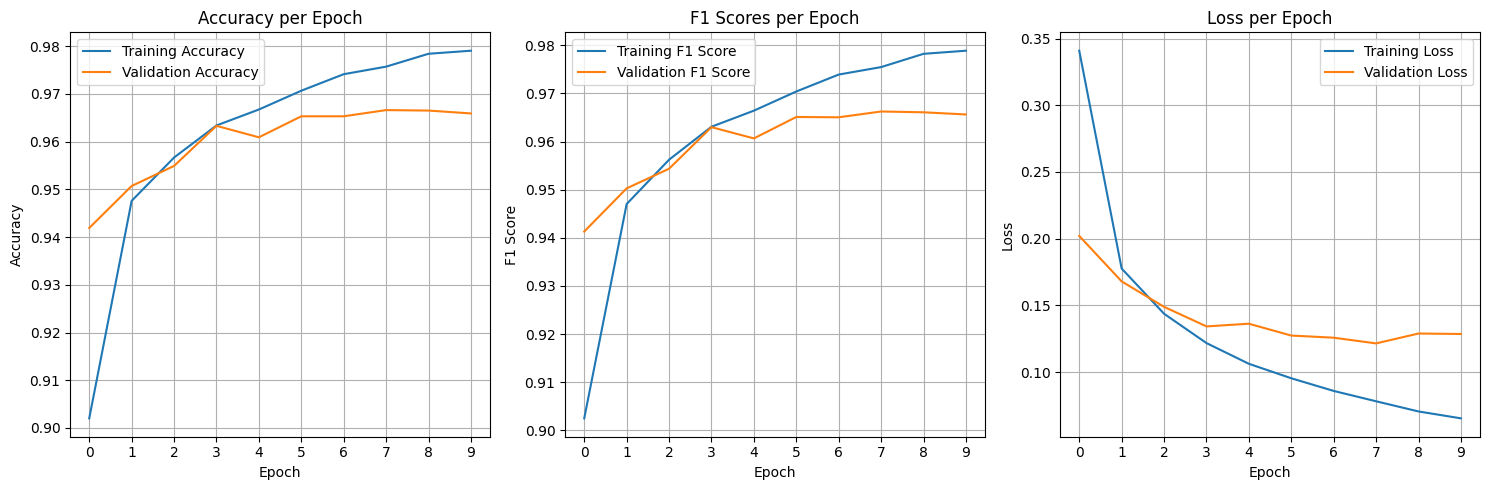

In [ ]:
# Plotting manually like we did in task 2:


# Extracting data from training history
accuracy = training_history2.history['accuracy']
val_accuracy = training_history2.history['val_accuracy']
f1_scores = training_history2.history['f1_score']
val_f1_scores = training_history2.history['val_f1_score']
loss = training_history2.history['loss']
val_loss = training_history2.history['val_loss']

# Calculating average F1 scores
average_f1_scores = np.mean(f1_scores, axis=1)
average_val_f1_scores = np.mean(val_f1_scores, axis=1)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Accuracy
axs[0].plot(accuracy, label='Training Accuracy')
axs[0].plot(val_accuracy, label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_xticks(range(len(accuracy)))
axs[0].grid()
axs[0].legend()

# Plot F1 Scores
axs[1].plot(average_f1_scores, label='Training F1 Score')
axs[1].plot(average_val_f1_scores, label='Validation F1 Score')
axs[1].set_title('F1 Scores per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('F1 Score')
axs[1].set_xticks(range(len(average_f1_scores)))
axs[1].grid()
axs[1].legend()

# Plot Loss
axs[2].plot(loss, label='Training Loss')
axs[2].plot(val_loss, label='Validation Loss')
axs[2].set_title('Loss per Epoch')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Loss')
axs[2].set_xticks(range(len(loss)))
axs[2].grid()
axs[2].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()



## Task 3.3: Discuss the results
**Question 3.3.1**: Compare the performance of your new model with the model from Task 2. Did the new model achieve higher accuracy and F1-score? What could be the reasons for that?

**Question 3.3.2**: Did overfitting occur? If so, after how many epochs? Does overfitting typically increase or decrease with the increasing model complexity?

**Question 3.3.3**: How do accuracy and F1-Score values compare (are they similar or very different from each other)? What does it tell you about the MNIST dataset and which one of these metrics is more reliable in this case?

**Question 3.3.4**: Explain **very briefly** how each of the following model hyperparameters can impact the model's performance:
- Number of layers
- Number of neurons in a layer
- Activation functions
- Learning rate.
- Regularization techniques (such as L2 regularization).


**Answer 3.3.1**:
The first model from task 2 achieved an accuracy of 0.90 and f1-score of 0.90 after 5 epochs. The second model in task 3 achieved an accuracy of 0.96 and f1-score of 0.96 after 10 epochs. This shows that the second model performed better, and might be due to the difference in parameters, number of epochs, the activation function used, optimizers. In the second model, "softmax" was also used as activation function for the ouput layer which improves the models accuracy for categorical classification problems.


**Answer 3.3.2**:
Yes, overfitting did occur after about 2 epochs when increasing the model complexity. This indicates that increasing the complexity increases the risk of overfitting. This is because by for example increasing the amount of layers, the model learns more intricate patterns and relationships in the training data.


**Answer 3.3.3**:
The accuracy and f1-score are almost the same value. The close values of accuracy and F1 score suggest that the model performs well across all classes. the accuracy is a straightforward metric since it indicates how often the model is correct in classifiying samples overall. the f1-score considers both false positives and false negatives, and is favorable when dealing with imbalanced classes. The mnist-dataset is a well balanced dataset with roughly same amount of samples in each class, and therefore is both metrics reliable. However, if dealing with imbalanced data, f1-score would be the more reliable metric.


**Answer 3.3.4**:
**Number of layers:**
more layers can increase the model's ability to learn complex patterns, but too many layers can lead to overfitting.

**Number of neurons in a layer:**
More neurons allow the model to capture more features and learn complexities in the data. However, too many neurons can also lead to overfitting and higher computational costs.


**Activation functions:**
Choosing the right activation can enhance learning speed and model performance. for example "relu" is often preferred for hidden layers due to its efficiency and ability to handle the vanishing gradient problem.


**Learning rate:**
A higher learning rate can speed up training but may cause the model to overshoot optimal weights, meaning the model might skip over the best weights and not learn effectively. A lower learning rate results in more precise updates but can higher computational costs, and the model might get stuck in less optimal solutions (a local minima) and not reach the best solution.


**Regularization techniques (such as L2 regularization):**
Regularization help prevent overfitting by penalizing large weights, promoting simpler models that generalize better to unseen data.


# Task 4: Design and train a _classical_ machine learning classifier
Pick your **favourite** machine learning classifer that you learned about in DAT200 and train it for the MNIST handwritten digits recognition problem. (Hint: use the scikit-learn library). Remember to use **accuracy and the F1-score** as performance metrics.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Flattening data to be 2 dimensional instead of 3 dimensional
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten to
                                                      # (num_samples, 28*28)
X_test_flat = X_test.reshape(X_test.shape[0], -1)     # Flatten to
                                                      # (num_samples, 28*28)

# Now fit the Random Forest model
forest2 = RandomForestClassifier(max_depth=500, max_features='sqrt',
                                 n_estimators=100, random_state=42)
start_time = time.time()
forest2.fit(X_train_flat, y_train)
end_time = time.time()

# Prediction
y_pred_RF = forest2.predict(X_test_flat)

# Evaluate the performance of the model
forest_train_accuracy = forest2.score(X_train_flat, y_train)
forest_test_accuracy = forest2.score(X_test_flat, y_test)

print(f'Training data accuracy: {forest_train_accuracy:.2f}')
print(f'Test data accuracy: {forest_test_accuracy:.2f}')

# Calculate F1 Score
from sklearn.metrics import f1_score
f1_RF = f1_score(y_test, y_pred_RF, average='weighted')
print(f'F1 Score: {f1_RF:.2f}')

print(f'Training time is {end_time - start_time} seconds.')

Training data accuracy: 1.00
Test data accuracy: 0.90
F1 Score: 0.95
Training time is 97.79316663742065 seconds.


# Task 5: Compare and discuss
Evaluate the four models you have implemented in task 2, 3 and 4 on the test dataset and compare them based on
* Accuracies and F1-scores they attain
* Time it takes to train them

Did you experience any trouble when training models in tasks 2-4?

**Task 5 discussion Here:**


**Task 2:** \
**VA model:** Accuracy of 0.097 - Training time: 226 seconds

**ANN model 1:**
Accuracy: 0.90 - F1_score: 0.90 - Training time: 79 seconds.

**Task 3: ANN model 2**
Accuracy: 0.96 - F1_score: 0.96 - Training time: 113 seconds.

**Task 4: Random Forest model**
Accuracy: 0.90 - F1_score: 0.95 - Training time: 98 seconds.

The results show that the performance of the TensorFlow implementation is better than the Numpy implementation in terms of accuracy, F1-score and the training time. When increasing number of hidden layers, the accuracy and F1-score increases, but the model takes longer to train. This is because the number of parameters increases.  \
The RandomForest classifier has approximately the same accuracy and F1-score as the Keras models, but is more efficient than model 2 with two hidden layers. This is because the training of decision trees involves partitioning the dataset based on feature values, not based on gradient optimization as in neural networks. RandomForest is also less computationally intensive as it do not involve backpropagation, which is used in neural networks.

**Issues during training with RandomForest:** We had issues with the data structure, so X_train and X_test had to be flattened. This model also show overfitting as training data had accuracy score of 1.00, while test data had accuracy score of 0.90.

